In [1]:
# 標準ライブラリ
from datetime import datetime, timedelta
from typing import Optional


# サードパーティライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.figure import Figure

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph


In [4]:
hard_sales_df = hs.load_hard_sales()

In [ ]:
# 特定の機種に絞る
ps5_df = hard_sales_df.loc[hard_sales_df["hw"] == "PS5"].copy()
ps5_df.set_index("report_date", inplace=True)

# 週毎比較:横軸を年、縦軸を 通算週番号にしたテーブル。unitsは各週の集計値
ps5_df["week_of_year"] = ps5_df.index.isocalendar().week
ps5_week_pivot_df = ps5_df.pivot_table(index="week_of_year", columns="year", values="units", aggfunc="sum")
ps5_week_pivot_df

year,2020,2021,2022,2023,2024,2025
week_of_year,,,,,,
1,NaN,11164.0,10677.0,42578.0,41126.0,46680.0
2,NaN,7328.0,14453.0,44113.0,36506.0,11828.0
3,NaN,17348.0,18857.0,42152.0,57903.0,10738.0
4,NaN,25948.0,23339.0,62908.0,49945.0,12341.0
5,NaN,13524.0,16888.0,93026.0,34484.0,12873.0
6,NaN,22890.0,6418.0,93574.0,40745.0,14408.0
7,NaN,25037.0,25434.0,88653.0,38212.0,16049.0
8,NaN,33838.0,17032.0,91729.0,33504.0,13556.0
9,NaN,22549.0,25679.0,78412.0,48067.0,108978.0


In [ ]:
# 月毎比較:横軸を年、縦軸を月にしたテーブル。pivot前に月毎にリサンプリング合計し、その値を使う
ps5_unit_df = ps5_df.resample("M").sum(numeric_only=True)
ps5_month_pivot_df = ps5_unit_df.pivot_table(index=lambda x: x.month, columns=lambda x: x.year, values="units")
ps5_month_pivot_df.fillna(0, inplace=True)
ps5_month_pivot_df

report_date,2020,2021,2022,2023,2024,2025
report_date,,,,,,
1,NaN,72420.0,114003.0,234329.0,185480.0,81587.0
2,NaN,95289.0,65772.0,366982.0,146945.0,56886.0
3,NaN,157352.0,94407.0,222656.0,162281.0,218300.0
4,NaN,78567.0,70830.0,219646.0,91981.0,38983.0
5,NaN,123272.0,81598.0,166660.0,87218.0,32001.0
6,NaN,76533.0,53239.0,215521.0,117592.0,63516.0
7,NaN,58979.0,100797.0,243383.0,123087.0,28959.0
8,NaN,78019.0,87364.0,181361.0,104178.0,30700.0
9,NaN,76615.0,63858.0,181056.0,74523.0,NaN


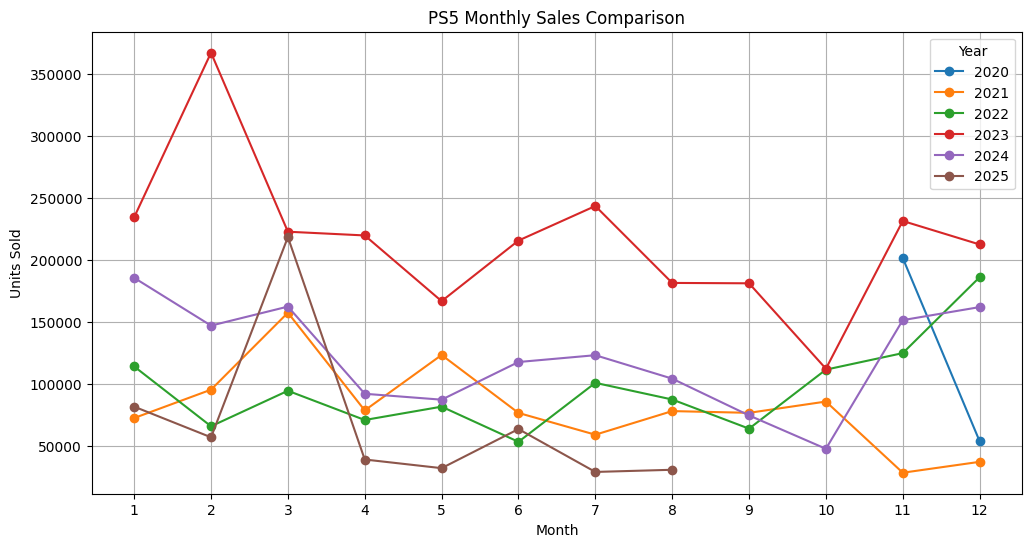

In [ ]:
# ps5_month_pivot_df を折れ線グラフにプロットする
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for year in ps5_month_pivot_df.columns:
    plt.plot(ps5_month_pivot_df.index, ps5_month_pivot_df[year], marker='o', label=year)
plt.title("PS5 Monthly Sales Comparison")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(ps5_month_pivot_df.index)
plt.legend(title="Year")
plt.grid()
plt.show()

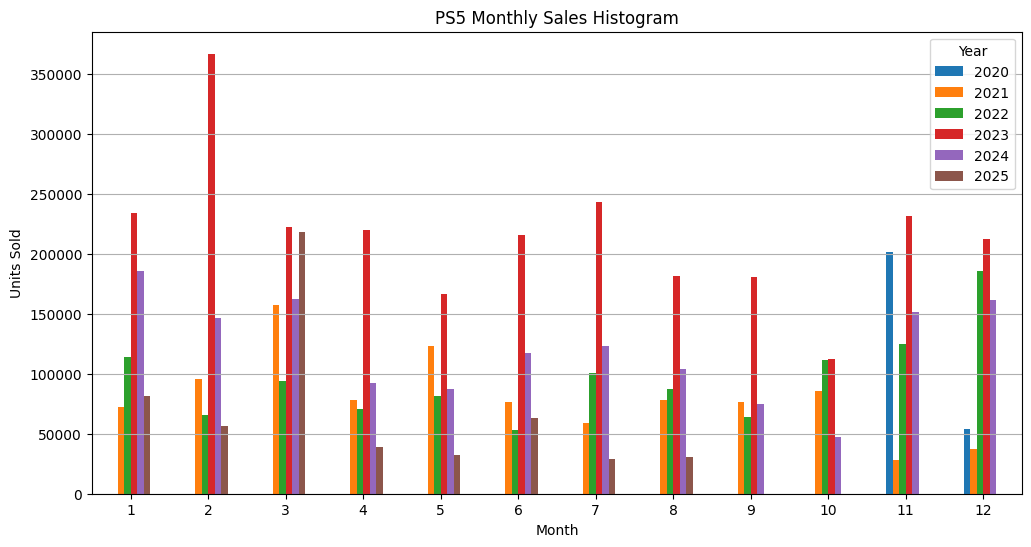

In [ ]:
# ps5_month_pivot_df をヒストグラムにする
ps5_month_pivot_df.plot(kind='bar', figsize=(12, 6))
plt.title("PS5 Monthly Sales Histogram")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=0)
plt.legend(title="Year")
plt.grid(axis='y')
plt.show()

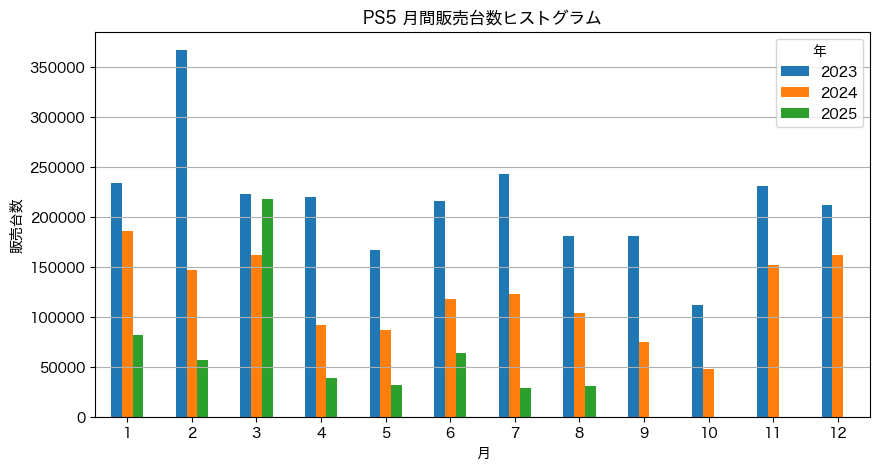

In [8]:


def plot_monthly_histogram(hw:str, begin:Optional[datetime] = None, 
                           end:Optional[datetime] = None) -> tuple[Figure, pd.DataFrame]:
    hard_sales_df = hs.load_hard_sales()
    if begin is not None:
        hard_sales_df = hard_sales_df.loc[hard_sales_df["report_date"] >= begin]
    if end is not None:
        hard_sales_df = hard_sales_df.loc[hard_sales_df["report_date"] <= end]
    
    monthly_df = hs.monthly_sales(hard_sales_df)
    # 特定の機種に絞る
    hw_df = monthly_df.loc[monthly_df["hw"] == hw].copy()
    pivot_hw_df = hw_df.pivot(index="month", columns="year", values="monthly_units")
    pivot_hw_df.fillna(0, inplace=True)

    fig, ax = plt.subplots(figsize=ph.get_figsize())
    plt.rcParams['font.family'] = 'Hiragino Sans'
    plt.rcParams['axes.unicode_minus'] = False
    pivot_hw_df.plot(kind='bar', ax=ax)
    ax.set_title(f"{hw} 月間販売台数ヒストグラム")
    ax.set_xlabel("月")
    ax.set_ylabel("販売台数")
    ax.set_xticks(range(len(pivot_hw_df.index)))
    ax.set_xticklabels(pivot_hw_df.index, rotation=0)
    ax.legend(title="年")

    # 縦軸の表示を指数表示から整数表示に変更
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax.ticklabel_format(style='plain', axis='y')

    ax.grid(axis='y')
    return fig, pivot_hw_df

(fig, df) = plot_monthly_histogram("PS5", begin=datetime(2023,1,1))


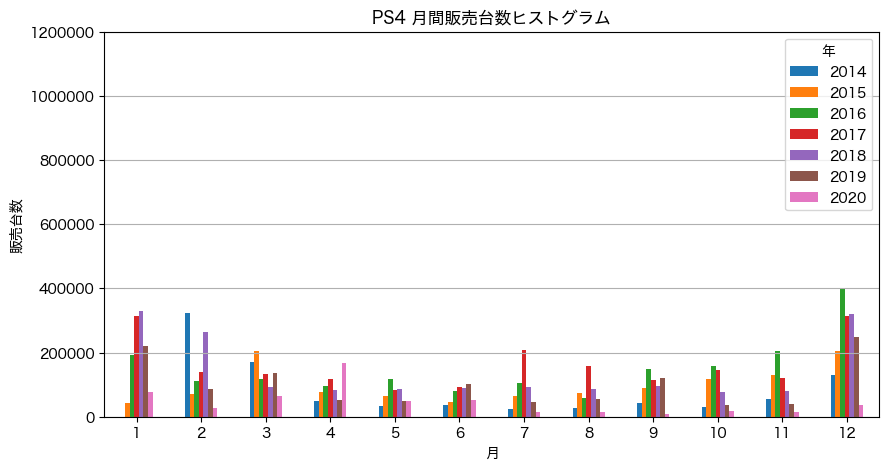

In [3]:
(fig, df) = ph.plot_monthly_histogram("PS4", end=datetime(2020,12,31), ymax=1200000)

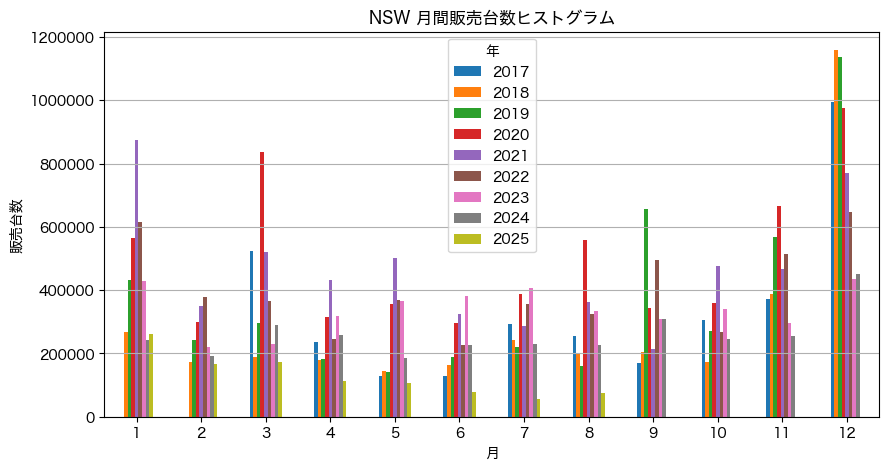

In [4]:
(fig, df) = ph.plot_monthly_histogram("NSW")

(<Figure size 1000x500 with 1 Axes>,
 hw          NS2        NSW        PS5
 year                                 
 2017        0.0  3407158.0        0.0
 2018        0.0  3482388.0        0.0
 2019        0.0  4493903.0        0.0
 2020        0.0  5956943.0   255150.0
 2021        0.0  5579127.0   968185.0
 2022        0.0  4804546.0  1154054.0
 2023        0.0  4062609.0  2587468.0
 2024        0.0  3109103.0  1454149.0
 2025  1892123.0  1029132.0   550932.0)

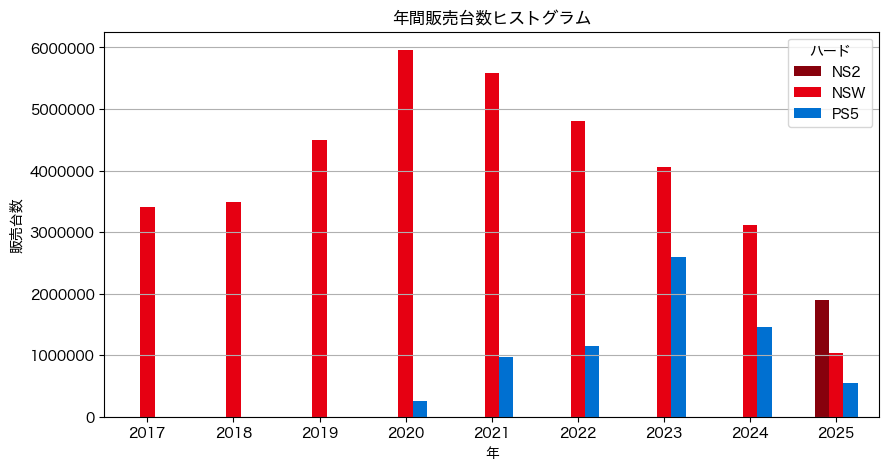

In [4]:
ph.plot_yearly_histogram(hw=["PS5", "NS2", "NSW"])

In [13]:
delta_yearly_df = hs.delta_yearly_sales(hard_sales_df)
delta_yearly_df.loc[delta_yearly_df["hw"] == "NSW"]

,delta_year,hw,yearly_units,sum_units
6,0,NSW,3407158,3407158
27,1,NSW,3482388,6889546
49,2,NSW,4493903,11383449
71,3,NSW,5956943,17340392
92,4,NSW,5579127,22919519
112,5,NSW,4804546,27724065
130,6,NSW,4062609,31786674
143,7,NSW,3109103,34895777
154,8,NSW,1029132,35924909


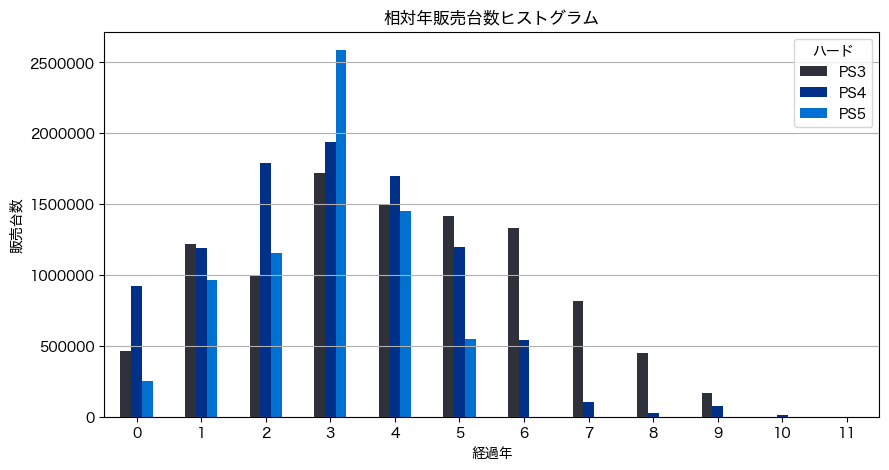

In [ ]:
(fig, df) = ph.plot_delta_yearly_histogram(["PS3", "PS4", "PS5"], delta_end=7)

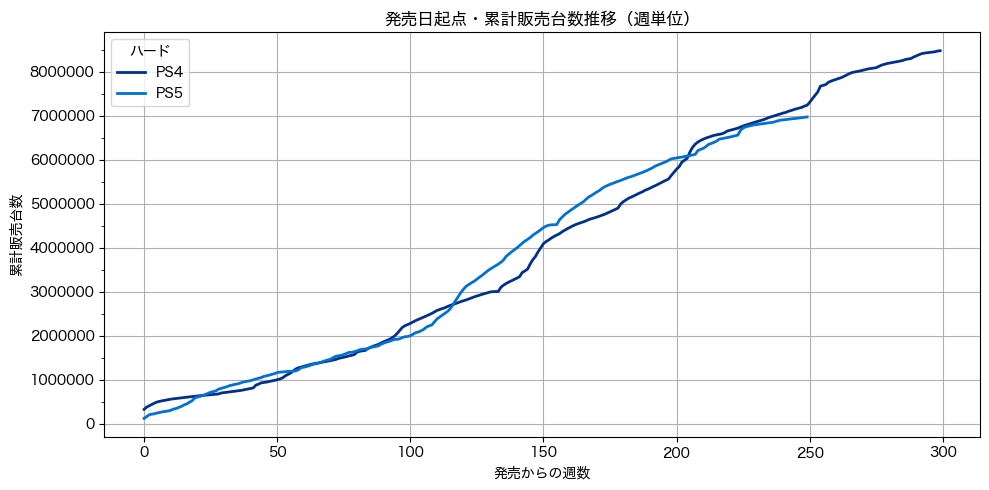

In [3]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=['PS5', "PS4"], mode = "week", limit=300)


In [ ]:
ps4_df = hard_sales_df.loc[hard_sales_df["hw"] == "PS4"].copy()
ps4_df = ps4_df.loc[ps4_df["delta_week"] > 230]
ps4_df.head(20)

,weekly_id,begin_date,end_date,report_date,period_date,hw,units,year,month,mday,...,delta_day,delta_week,delta_month,delta_year,avg_units,sum_units,launch_date,maker_name,full_name,day_of_year
6715,2018-07-29_PS4,2018-07-23,2018-07-29,2018-07-29,7,PS4,17572,2018,7,29,...,1618,231,53,4,2510,6878487,2014-02-22,SONY,PlayStation4,210
6720,2018-08-05_PS4,2018-07-30,2018-08-05,2018-08-05,7,PS4,17254,2018,8,5,...,1625,232,54,4,2464,6895741,2014-02-22,SONY,PlayStation4,217
6725,2018-08-12_PS4,2018-08-06,2018-08-12,2018-08-12,7,PS4,19754,2018,8,12,...,1632,233,54,4,2822,6915495,2014-02-22,SONY,PlayStation4,224
6730,2018-08-19_PS4,2018-08-13,2018-08-19,2018-08-19,7,PS4,26811,2018,8,19,...,1639,234,54,4,3830,6942306,2014-02-22,SONY,PlayStation4,231
6735,2018-08-26_PS4,2018-08-20,2018-08-26,2018-08-26,7,PS4,22242,2018,8,26,...,1646,235,54,4,3177,6964548,2014-02-22,SONY,PlayStation4,238
6740,2018-09-02_PS4,2018-08-27,2018-09-02,2018-09-02,7,PS4,17564,2018,9,2,...,1653,236,55,4,2509,6982112,2014-02-22,SONY,PlayStation4,245
6745,2018-09-09_PS4,2018-09-03,2018-09-09,2018-09-09,7,PS4,18974,2018,9,9,...,1660,237,55,4,2710,7001086,2014-02-22,SONY,PlayStation4,252
6750,2018-09-16_PS4,2018-09-10,2018-09-16,2018-09-16,7,PS4,20849,2018,9,16,...,1667,238,55,4,2978,7021935,2014-02-22,SONY,PlayStation4,259
6755,2018-09-23_PS4,2018-09-17,2018-09-23,2018-09-23,7,PS4,17299,2018,9,23,...,1674,239,55,4,2471,7039234,2014-02-22,SONY,PlayStation4,266
6760,2018-09-30_PS4,2018-09-24,2018-09-30,2018-09-30,7,PS4,20520,2018,9,30,...,1681,240,55,4,2931,7059754,2014-02-22,SONY,PlayStation4,273


In [ ]:
ps5_2425_df = ps5_month_pivot_df[[2024, 2025]].copy()


In [ ]:
# 8月までに絞り込む,外れ値である3月の行も除く
ps5_2425_8_df = ps5_2425_df.loc[(ps5_2425_df.index <= 8) & (ps5_2425_df.index != 3)].copy()
# 最後の行に合計を追加
ps5_2425_8_df.loc["合計"] = ps5_2425_8_df.sum()
# 合計の比率も計算
# ps5_2425_8_df["昨年比"] = ps5_2425_8_df[2025].where(ps5_2425_8_df[2025].notna(), np.nan) / ps5_2425_8_df[2024]
ps5_2425_8_df["昨年比"] = ps5_2425_8_df[2025] / ps5_2425_8_df[2024]
# 合計のスタイルを太字にする
ps5_2425_8_df.style.applymap(lambda x: 'font-weight: bold' if x.name == "合計" else '')
display(ps5_2425_8_df)


report_date,2024,2025,昨年比
report_date,,,
1,185480.0,81587.0,0.439870
2,146945.0,56886.0,0.387124
4,91981.0,38983.0,0.423816
5,87218.0,32001.0,0.366908
6,117592.0,63516.0,0.540139
7,123087.0,28959.0,0.235273
8,104178.0,30700.0,0.294688
合計,856481.0,332632.0,0.388371


MHWsの影響の大きい3月の影響を除くと、昨年比比率は0.388371 これを元に推定値を計算

In [ ]:
# ps5_2425_dfに推定値カラムを追加
# ps5_2425_df[2025]の値がNaNではない場合は、その値を推定値カラムにそのままコピー
# NaNだった場合には、ps5_2425_df[2024]の値に　0.388371を掛け算し、その結果を推定値カラムに代入
ps5_2425_df["推定値"] = ps5_2425_df[2025].where(ps5_2425_df[2025].notna(), ps5_2425_df[2024] * 0.388371)
# 最後に合計行を追加
ps5_2425_df.loc["合計"] = ps5_2425_df.sum()
ps5_2425_df

report_date,2024,2025,推定値
report_date,,,
1,185480.0,81587.0,81587.000000
2,146945.0,56886.0,56886.000000
3,162281.0,218300.0,218300.000000
4,91981.0,38983.0,38983.000000
5,87218.0,32001.0,32001.000000
6,117592.0,63516.0,63516.000000
7,123087.0,28959.0,28959.000000
8,104178.0,30700.0,30700.000000
9,74523.0,NaN,28942.572033


In [ ]:
hard_yearly_df = hard_sales_df.copy()

hard_yearly_df = hard_yearly_df.groupby(["hw", "year"]).agg({"units": "sum"}).reset_index()
# unitsが800000台以下のもののみ抽出
hard_yearly_df = hard_yearly_df[(hard_yearly_df["units"] <= 850000) & (hard_yearly_df["units"] >= 500000)]
# units順にソート
hard_yearly_df = hard_yearly_df.sort_values("units", ascending=False)
display(hard_yearly_df)

,hw,year,units
98,PS3,2013,818804
84,PS2,2007,818773
50,N64,1999,740509
140,WS,1999,684517
132,Vita,2012,680895
158,WiiU,2015,678131
26,DS,2011,648509
155,WiiU,2012,635290
45,GC,2004,617783
72,PS,2000,609912


PS3 2013年　最終年 (海外では2023/11/15、日本では2014年2月にPS4発売)
PS2 2007年　PS3が2006年11月に発売後のwinning run
PS4 2020年　最終年　2020年11月にPS5発売

N64 1999年　3年目、特になし
DS 2011年  3Dが2011年2月に発売
WiiU 2015年　



	•	PlayStation 2 (PS2)　2000年3月4日
	•	PlayStation 3 (PS3)　2006年11月11日
	•	PlayStation 4 (PS4)　2014年2月22日
※海外（北米など）では2013年11月15日発売だが、日本は約3か月遅れ。
	•	PlayStation 5 (PS5)　2020年11月12日
	•	PlayStation Vita (PS Vita)2011年12月17日




In [ ]:
monthly_df = hs.monthly_sales(hard_sales_df)
ps5_monthly_df = monthly_df.loc[monthly_df["hw"] == "PS5"]
ps5_monthly_df
ps5_monthly_df.pivot(index="month", columns="year", values="monthly_units")

year,2020,2021,2022,2023,2024,2025
month,,,,,,
1,NaN,72420.0,114003.0,234329.0,185480.0,81587.0
2,NaN,95289.0,65772.0,366982.0,146945.0,56886.0
3,NaN,157352.0,94407.0,222656.0,162281.0,218300.0
4,NaN,78567.0,70830.0,219646.0,91981.0,38983.0
5,NaN,123272.0,81598.0,166660.0,87218.0,32001.0
6,NaN,76533.0,53239.0,215521.0,117592.0,63516.0
7,NaN,58979.0,100797.0,243383.0,123087.0,28959.0
8,NaN,78019.0,87364.0,181361.0,104178.0,30700.0
9,NaN,76615.0,63858.0,181056.0,74523.0,NaN
